## Using outputs

In [1]:
!pip install pybamm
import pybamm as pb

c:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


Outputs of a simulation can be accessed via ``` sim.solve([0, t]) ```.

If the ``` sim ``` object has been solved:

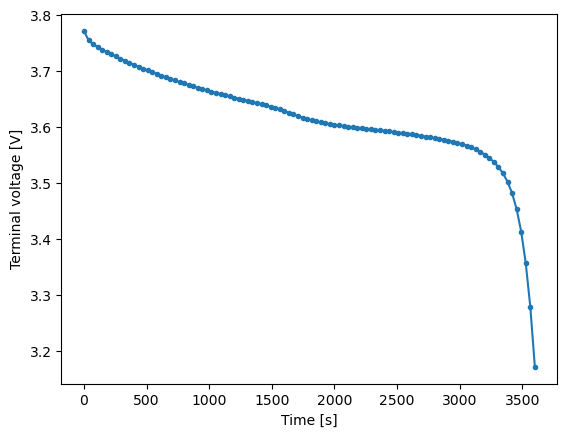

In [15]:
# There are two ways of accessing the solution to a simulation:
model = pb.lithium_ion.DFN()
sim = pb.Simulation(model)

sol = sim.solve([0,3600])
#sol = sim.solution

# this returns a "pybamm.ProcessedVariable" object
sol["Terminal voltage [V]"]


import numpy as np
import matplotlib.pyplot as plt

# this then can be used to calculate the value of variable at an array of times:
times = np.linspace(0, 3600, 100)                          # create an array of 100 "times" between 0 and 3600s (1hr)
terminal_voltage = sol["Terminal voltage [V]"](times)       # this calculates the terminal voltage at each time

# plotting terminal voltage against time

plt.plot(times, terminal_voltage, ".-")
plt.xlabel("Time [s]")
plt.ylabel("Terminal voltage [V]")
plt.show()

# The solution object contains the entire solution of the simulation, calculated at set timepoints chosen by the solver
# this can be accessed via:
sol.t
#print("Simulation time points:", sol.t)
# this is also useful to judge the resolution required for a smooth plot

# associated values of a variable at these times can be accessed using "entries" attribute of the "ProcessedVariables" object:
terminal_voltage = sol["Terminal voltage [V]"].entries
#print("Terminal voltages:", terminal_voltage)

## Task:
Run a simulation using an experiment of your choice. Using matplotlib, plot a variable of your choice against the times used by the solver. Add points to the plot to show where the solver has calculated the solution.

In [14]:
print(pb.ParameterValues("Chen2020"))

{'Ambient temperature [K]': 298.15,
 'Boltzmann constant [J.K-1]': 1.380649e-23,
 'Bulk solvent concentration [mol.m-3]': 2636.0,
 'Cation transference number': 0.2594,
 'Cell cooling surface area [m2]': 0.00531,
 'Cell thermal expansion coefficient [m.K-1]': 1.1e-06,
 'Cell volume [m3]': 2.42e-05,
 'Contact resistance [Ohm]': 0,
 'Current function [A]': 5.0,
 'EC diffusivity [m2.s-1]': 2e-18,
 'EC initial concentration in electrolyte [mol.m-3]': 4541.0,
 'Electrode height [m]': 0.065,
 'Electrode width [m]': 1.58,
 'Electrolyte conductivity [S.m-1]': <function electrolyte_conductivity_Nyman2008 at 0x0000016D5ABEBEC0>,
 'Electrolyte diffusivity [m2.s-1]': <function electrolyte_diffusivity_Nyman2008 at 0x0000016D5ABEADE0>,
 'Electron charge [C]': 1.602176634e-19,
 'Faraday constant [C.mol-1]': 96485.33212,
 'Ideal gas constant [J.K-1.mol-1]': 8.314462618,
 'Initial SEI thickness [m]': 5e-09,
 'Initial concentration in electrolyte [mol.m-3]': 1000.0,
 'Initial concentration in negative e

In [ ]:
model = pb.lithium_ion.DFN()                # create the model
params = pb.ParameterValues("Chen2020")     # define the parameter set

experiment = pb.Experiment([
    "Discharge at 1C until 3.3 V",
    "Charge at 0.3C until 4.0 V",
    "Hold at 4.0 V until C/100",
])

# define experiment protocol
experiment1 = pb.Experiment([
    "Discharge at 1C until 3.3 V",
    "Charge at C/20 for 20 hour",
    "Rest for 5 hour",
    "Discharge at C/20 for 20 hour",
    "Rest for 5 hour", 
])

sim = pb.Simulation(                        # simulate the model with the given experiment protocol and parameter set
    model,
    experiment = experiment,
    parameter_values = params,
)

sol = sim.solve()
sol.plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=3.3464206720220746, step=0.03346420672022075…

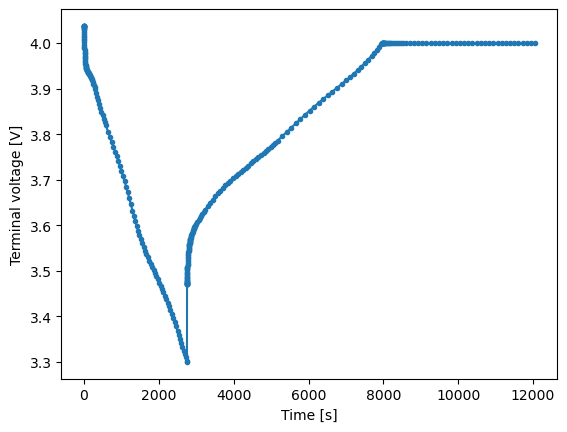

In [25]:
# plotting the graph
times = sol.t
terminal_voltage = sol["Terminal voltage [V]"](times)
plt.plot(times, terminal_voltage, ".-")
plt.xlabel("Time [s]")
plt.ylabel("Terminal voltage [V]")
plt.show()

In [41]:
# saving the solution to disk
path = "C:/Users/jw2324/OneDrive - Imperial College London/4_PROJECT/pybamm code/training/"
sol.save(path + "training_solution.pkl")

# loading a saved solution
sol2 = pb.load(path + "training_solution.pkl")

In [ ]:
# saving individual variables
sol.save_data(
    path + "tIV.pkl", ["Time [s]", "Current [A]", "Voltage [V]"]
)
sol.save_data(
    path + "tIV.csv", ["Time [s]", "Current [A]", "Voltage [V]"], to_format="csv"
)